In [19]:
## extract and resize images from the udacity dataset
from scipy.misc import imread
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [20]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# load data
import pickle
image_file = "course_images.p"
label_file = "course_labels.p"
X = None
Y = None
with open(image_file, "rb") as f:
    X = pickle.load(f)
with open(label_file, "rb") as f:
    Y = pickle.load(f)

In [4]:
print(X.shape, Y.shape)

(17760, 64, 64, 3) (17760,)


In [5]:
Y[Y == 0].shape # this confirms that the class is equal

(8968,)

In [22]:
# extract features from images
from functions import *

# define some parameters
color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 4 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (70, 70) # Spatial binning dimensions
hist_bins = 7    # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features 

# extract features
features = extract_features_from_array(X, color_space=color_space, spatial_size=spatial_size,
                     hist_bins=hist_bins, orient=orient,
                     pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, hog_channel=hog_channel,
                     spatial_feat=False, hist_feat=True, hog_feat=True)

In [7]:
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
X_scaler = StandardScaler().fit(features)
# Apply the scaler to X
scaled_X = X_scaler.transform(features)

In [12]:
features.shape

(17760, 10821)

In [11]:
features.shape
from sklearn.externals import joblib
joblib.dump(X_scaler, 'feature_scaler.pkl') 

['feature_scaler.pkl']

In [8]:
# split data
from sklearn.model_selection import train_test_split

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, Y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

Using: 9 orientations 8 pixels per cell and 4 cells per block
Feature vector length: 10821
7.59 Seconds to train SVC...
Test Accuracy of SVC =  0.9885


In [9]:
from sklearn.externals import joblib
joblib.dump(svc, 'svm_classifier.pkl') 

['svm_classifier.pkl']

In [25]:
from scipy.misc import imread
path = "../CarND-Advanced-Lane-Lines/video_images/imgv231.jpg"
img = imread(path)
img.shape

(720, 1280, 3)

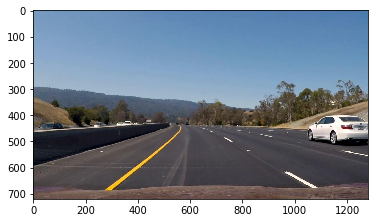

In [26]:
plt.imshow(img)

In [27]:
heat_map = vehicle_detection_pipeline(img)

/Users/michael/Documents/learn/self-driving-car/assignments/vehicle_tracking/functions.py:230: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  bottom_half = image[image.shape[0] / 2: image.shape[0], :, :]
/Users/michael/apps/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/michael/apps/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecation

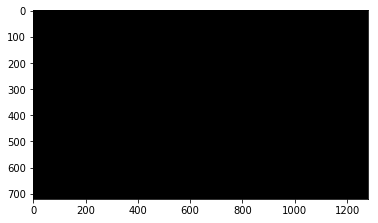

In [29]:
plt.imshow(heat_map)

In [22]:
bottom_region = img[img.shape[0]-361:img.shape[0] - 1, :]

In [23]:
bottom_region.shape

(360, 1280, 3)

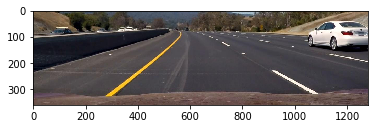

In [24]:
plt.imshow(bottom_region)

In [27]:
yuv_img = cv2.cvtColor(bottom_region, cv2.COLOR_RGB2YUV)

In [28]:
from skimage.feature import hog
orient = 9
pix_per_cell = 8
cell_per_block = 4
vis = False
feature_vec = False
hog_features = hog(yuv_img[:,:,0], orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True,
                                  visualise=vis, feature_vector=feature_vec)

In [29]:
hog_features.shape

(42, 157, 4, 4, 9)

In [32]:
from functions import *

img_file = "../CarND-Vehicle-Detection/test_images/test1.jpg"
img = imread(img_file)
bottom_half = img[img.shape[0] / 2: img.shape[0], :]
window_sizes = [64, 128]
orient = 9
pix_per_cell = 8
cell_per_block = 4
features = hog_for_region(bottom_half[:,:,0], window_sizes, orient, pix_per_cell, cell_per_block)

/Users/michael/apps/anaconda3/envs/carnd-term12/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [33]:
type(features)

list

In [34]:
type(features[0])

numpy.ndarray

In [35]:
windows = window_slider(img)

In [36]:
type(windows)

list

In [37]:
len(windows)

836

In [38]:
type(windows[0])

tuple

In [39]:
windows[0][0]

(0, 360)

In [40]:
windows[0][1]

(64, 424)

In [41]:
img.shape

(720, 1280, 3)

In [44]:
from scipy.misc import imresize
small_img = imresize(img, (64, 64))
hog = hog_for_region(small_img[:,:,0], [64], orient, pix_per_cell, cell_per_block)

In [46]:
len(hog)

1

In [47]:
hog[0].shape

(5, 5, 4, 4, 9)

In [53]:
from functions import *
spatial_color_features = get_spatial_color_features(small_img, False, True, 32, 7)

NameError: name 'get_spatial_color_features' is not defined